In [42]:
import pandas as pd
from utils_data import GEFcomSolarLoader, create_solar_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
dataset = create_solar_dataset()
dataset.head()

,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER,ZONE_1,ZONE_2,ZONE_3
0,2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103,1,0,0
1,2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000,1,0,0
2,2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397,1,0,0
3,2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449,1,0,0
4,2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987,1,0,0


In [44]:
dataset['TIMESTAMP'] = pd.to_datetime(dataset['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

In [45]:
features = [
            'VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165',
            'VAR166', 'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228'
        ]

In [46]:
dataset = dataset.set_index('TIMESTAMP')
dataset.sort_index
dataset.head()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER,ZONE_1,ZONE_2,ZONE_3
TIMESTAMP,,,,,,,,,,,,,,,,
2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103,1,0,0
2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000,1,0,0
2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397,1,0,0
2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449,1,0,0
2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987,1,0,0


In [47]:
first_date, last_date = dataset.index[0], dataset.index[-1]
first_date, last_date

(Timestamp('2012-04-01 01:00:00'), Timestamp('2014-07-01 00:00:00'))

In [48]:
len(set(dataset.index.date))

822

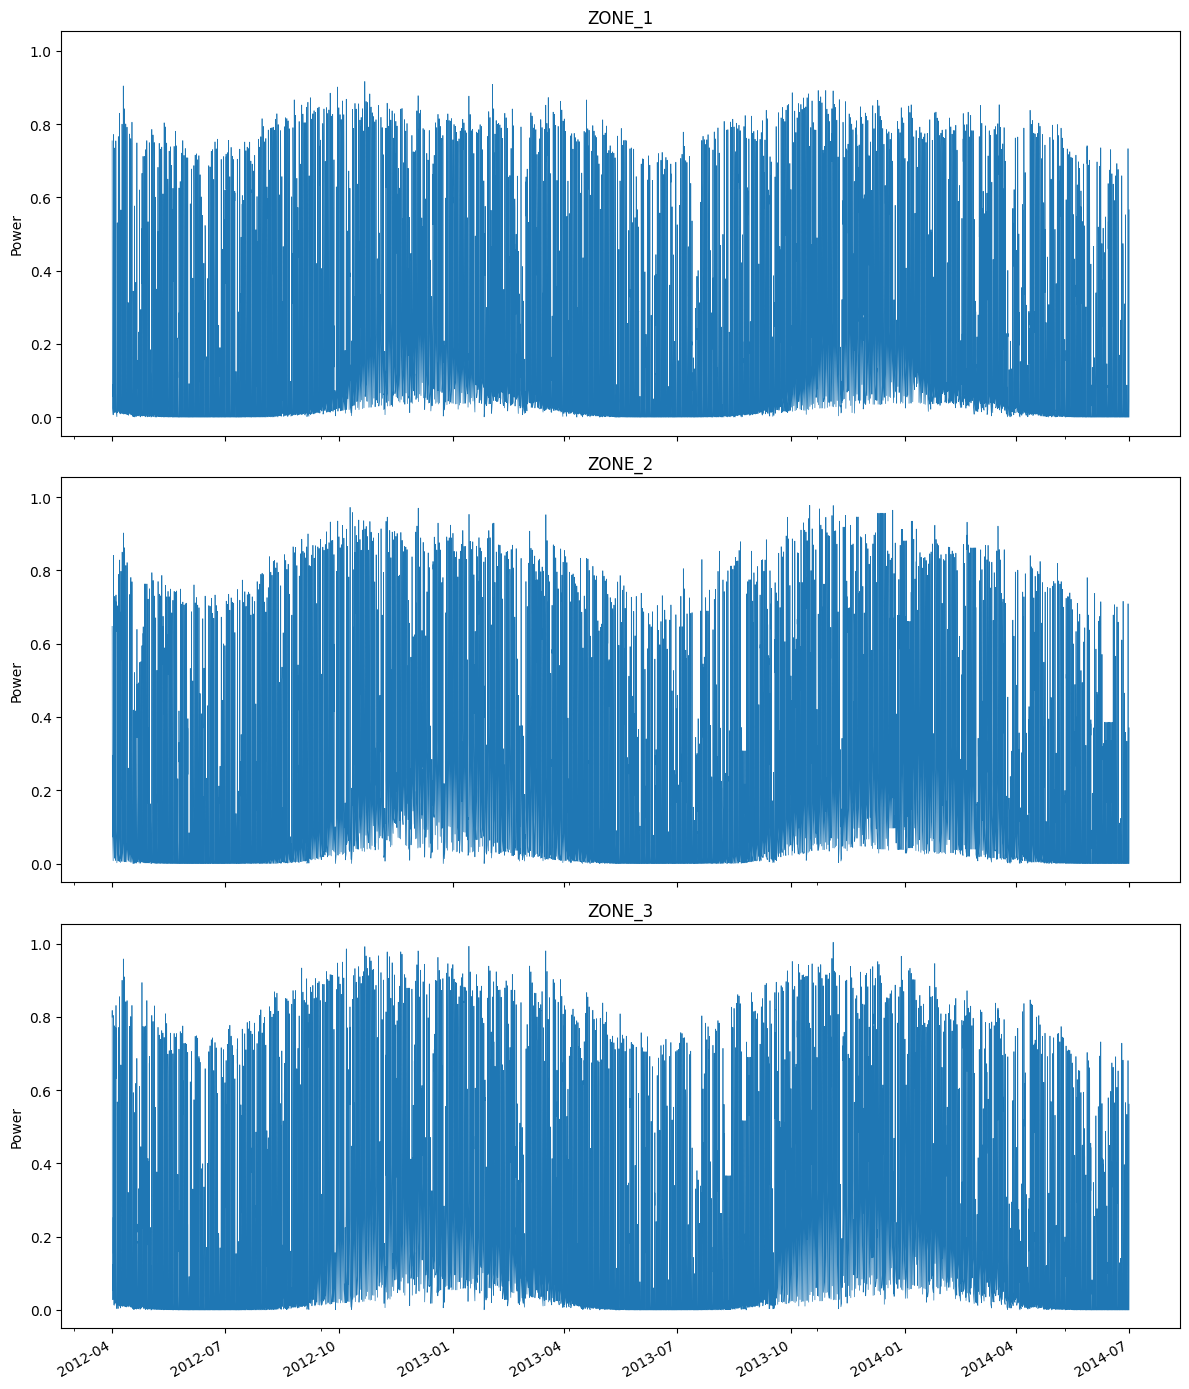

In [49]:
zones = ['ZONE_' + str(i) for i in range(1, 3 + 1)]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,14), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]
    # zone_df['POWER']['2012-04-01 01:00:00':'2012-09-01 01:00:00'].plot(ax=ax, linewidth=0.5)
    zone_df['POWER'].plot(ax=ax, linewidth=0.5)
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

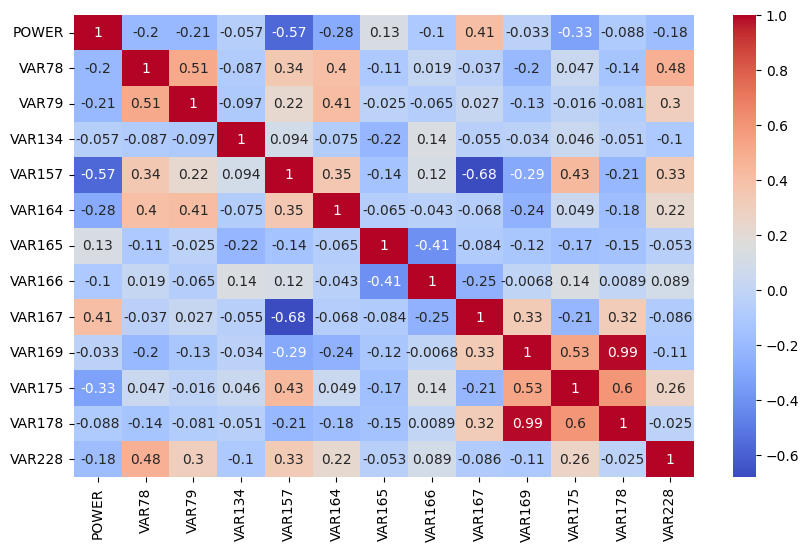

In [50]:
correleations = dataset[['POWER'] + features]
correleations = correleations.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correleations, annot=True, cmap="coolwarm")
plt.show()

<Axes: title={'center': 'Daily Average POWER'}, xlabel='Time', ylabel='Power'>

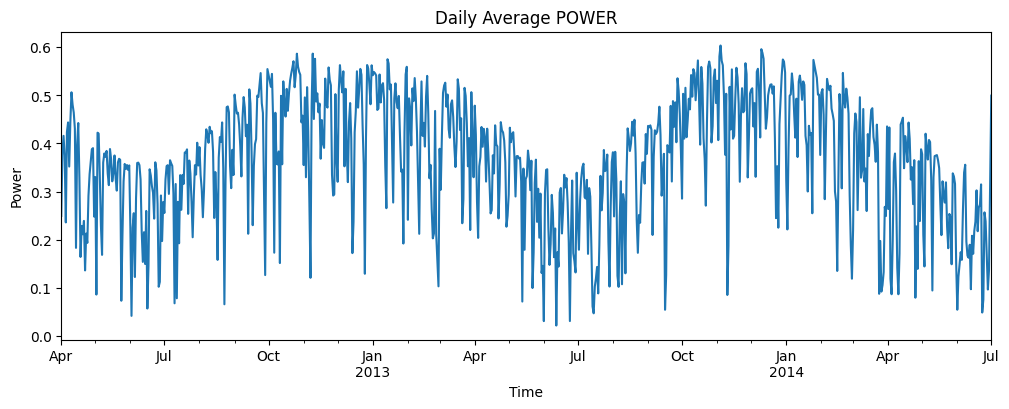

In [57]:
dataset.resample("D")["POWER"].mean().plot(figsize=(12,4), title="Daily Average POWER", xlabel="Time", ylabel="Power")

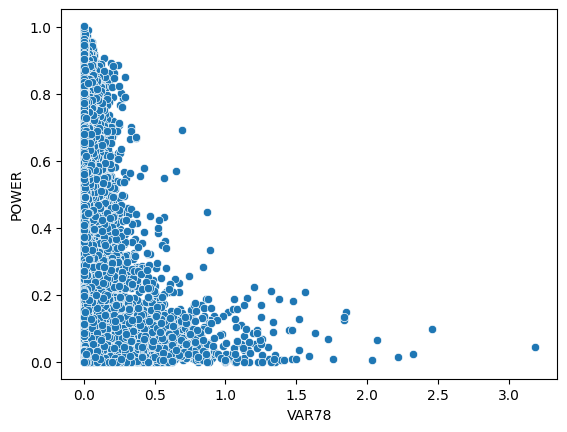

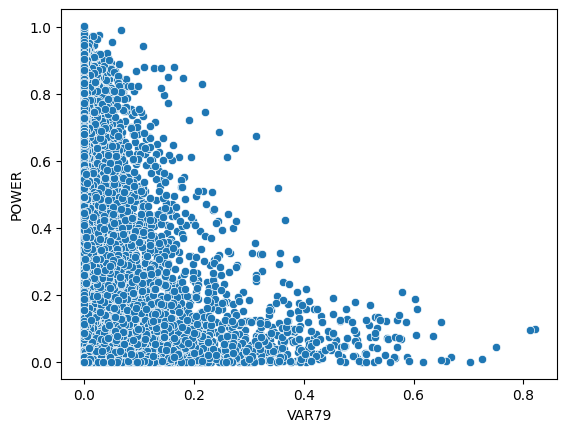

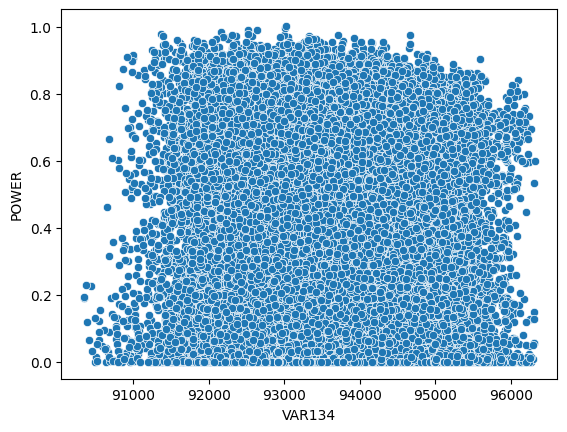

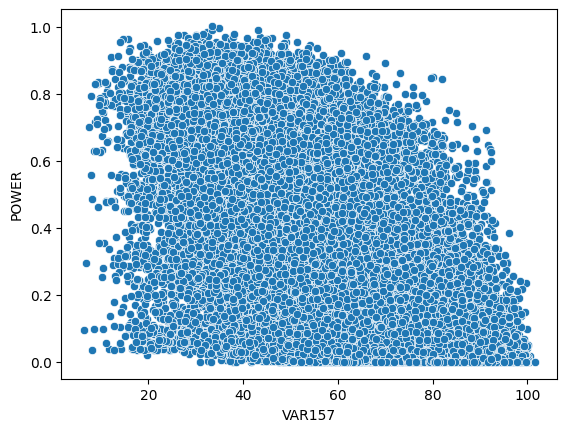

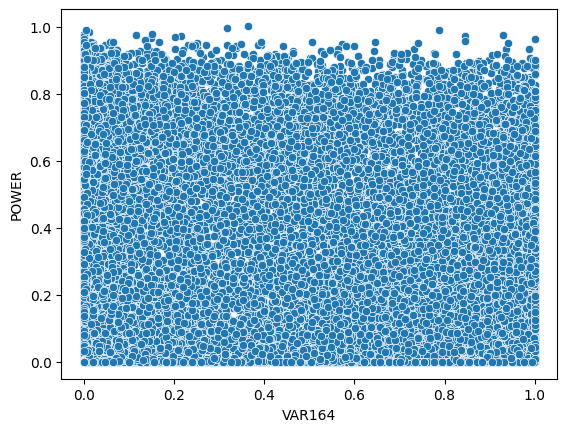

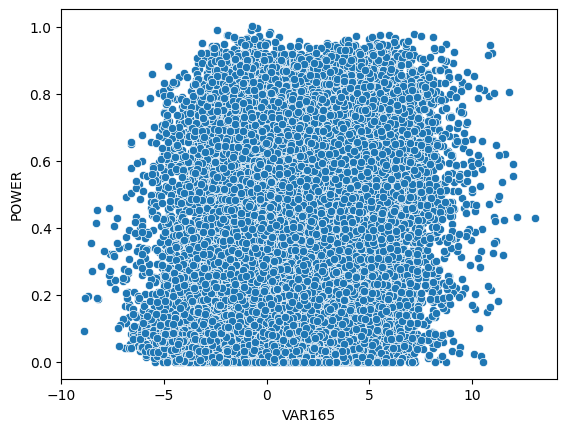

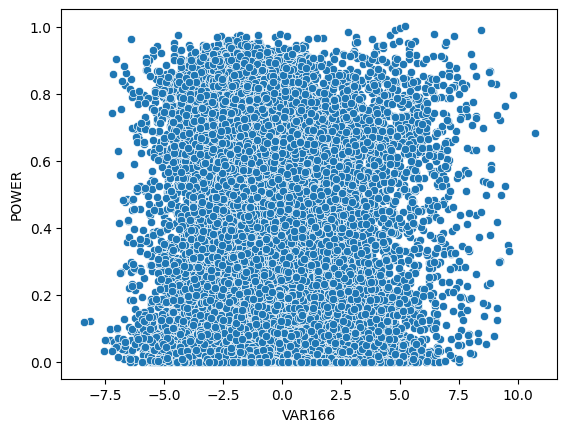

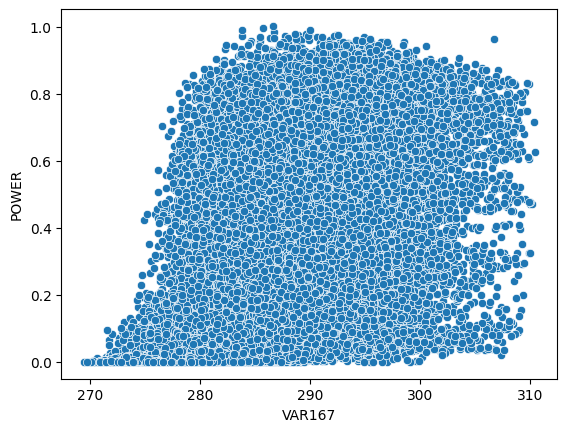

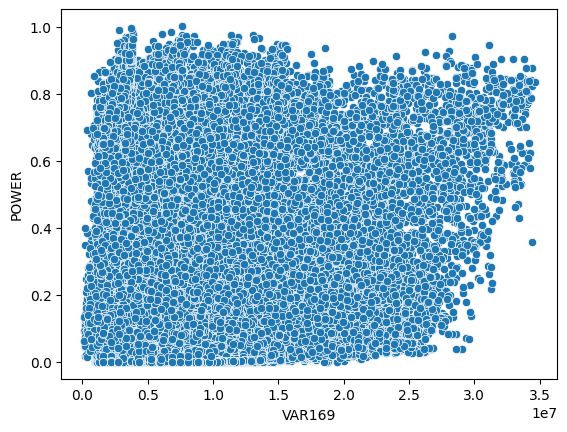

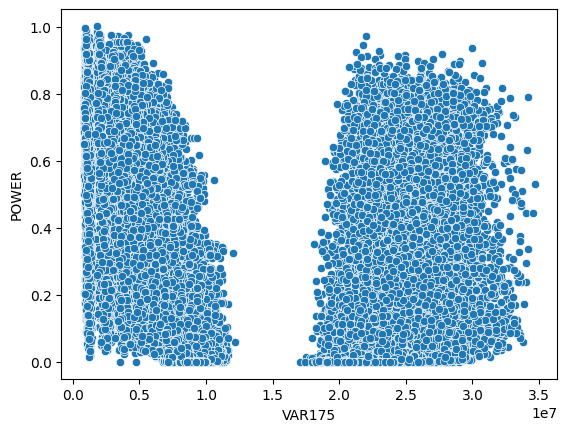

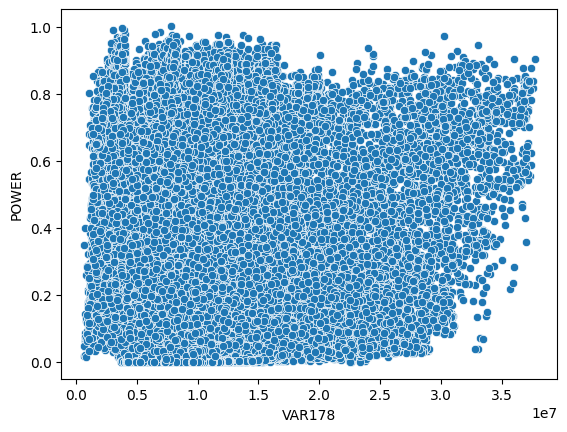

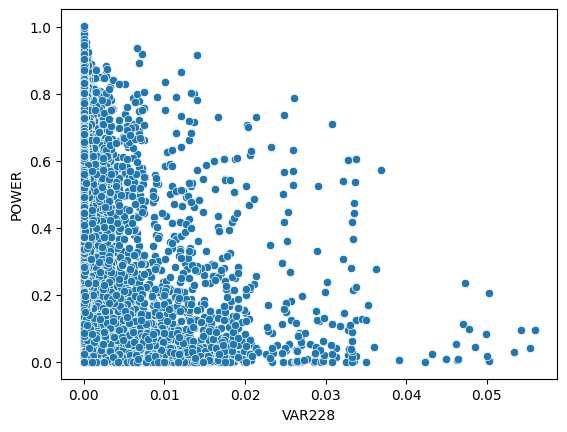

In [52]:
for feature in features:
    sns.scatterplot(x=feature, y="POWER", data=dataset)
    plt.show()

In [53]:
sns.__version__

'0.13.2'

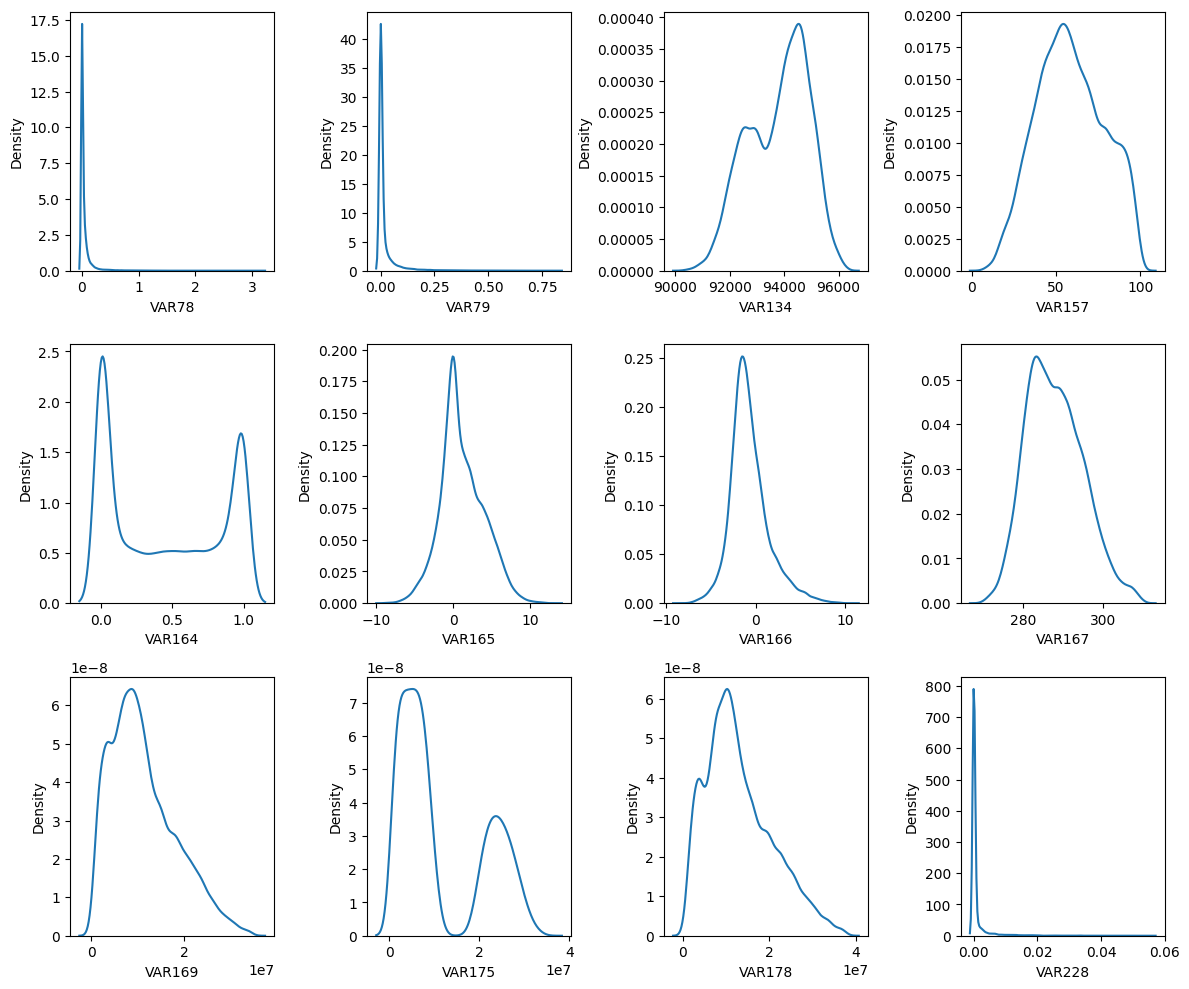

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,10))

axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.kdeplot(data=dataset, x=feature, ax=ax)

plt.tight_layout()
plt.show()